# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Game Recommendations on Steam" oleh Anton Kozyriev. Dataset ini memiliki 3 entities, diantaranya games.csv, users.csv, recommendations.csv. Pada kesempatan ini saya hanya menggunakan games.csv yang by record memiliki 50.000 baris. Hal ini tentunya sangat banyak jika semua baris data digunakan, kedepannya saya hanya akan mengambil 5000 baris data untuk submission machine learning ini.
- Terdapat 10 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('data/gamesales.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

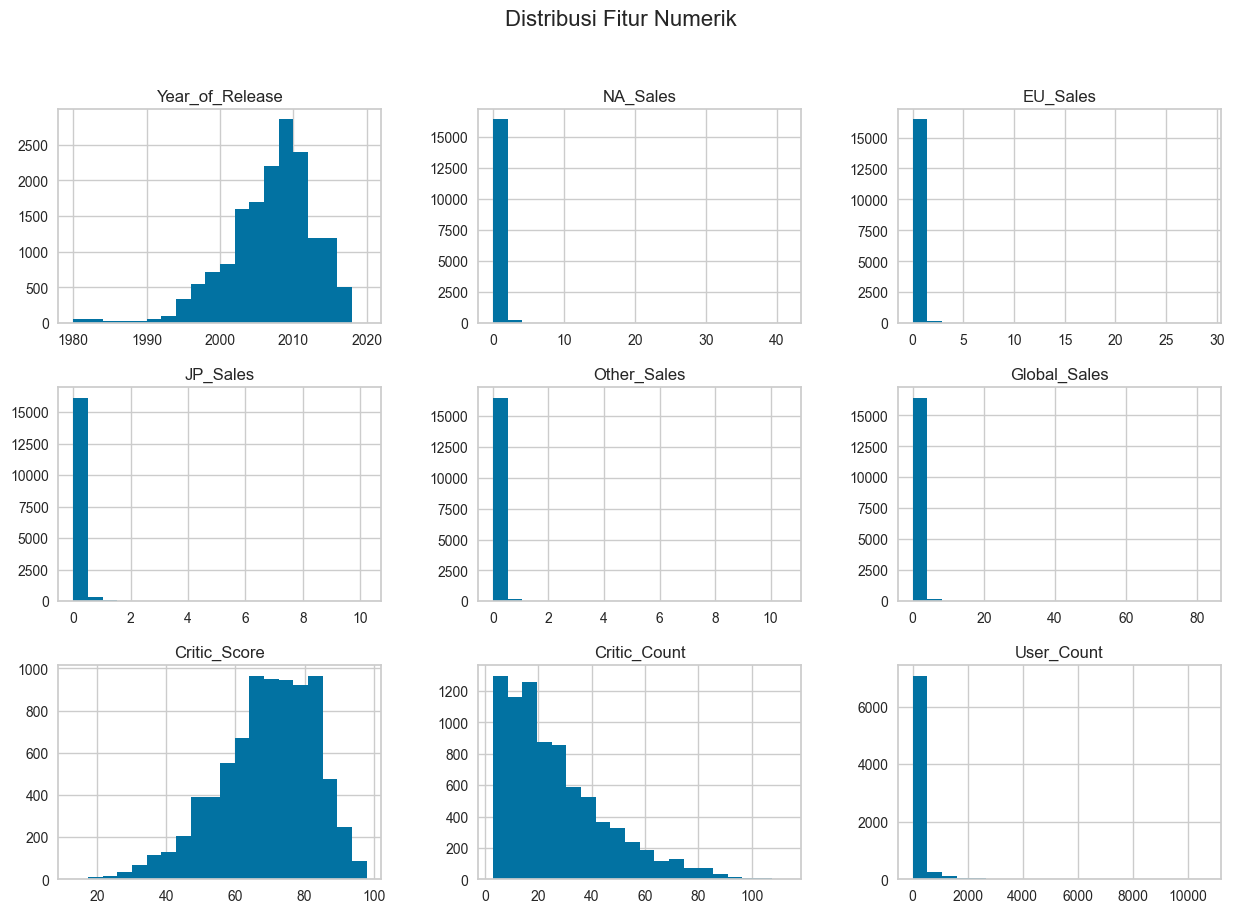

In [43]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ["Platform", "Genre", "User_Score", "Rating"]

df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

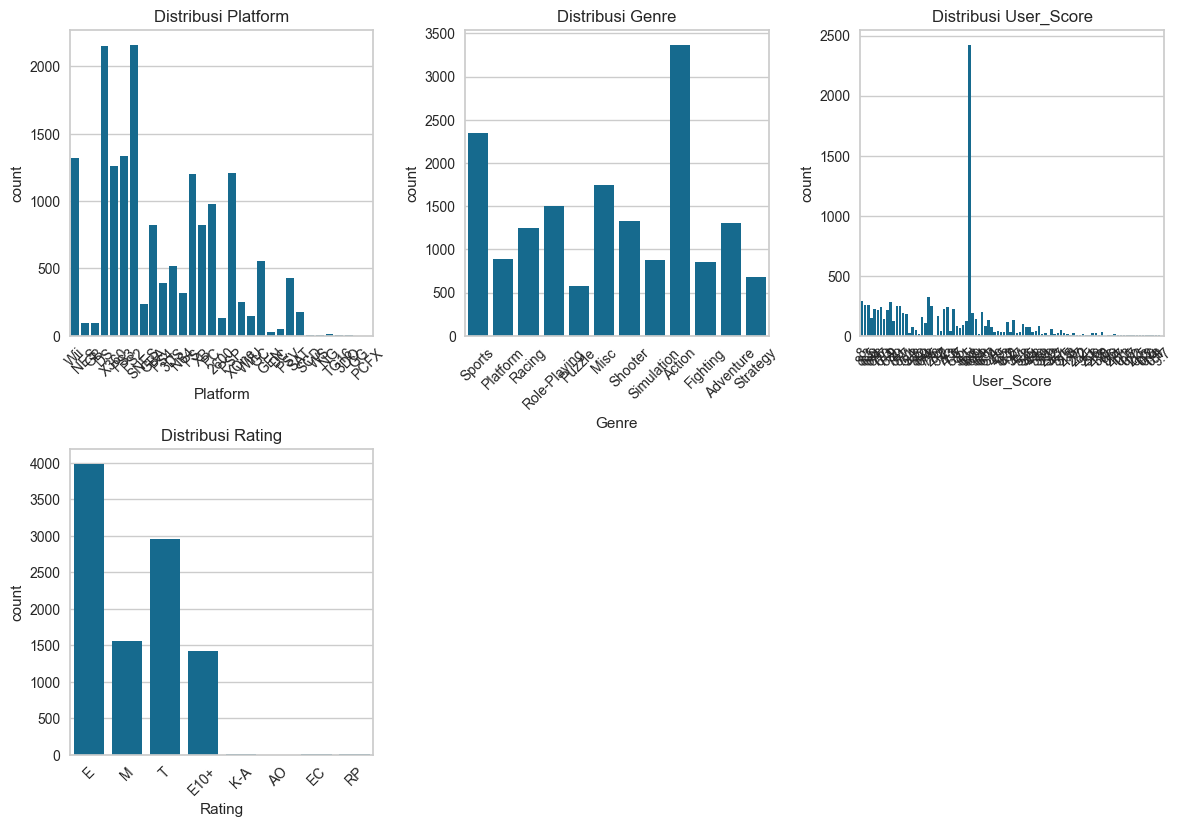

In [44]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

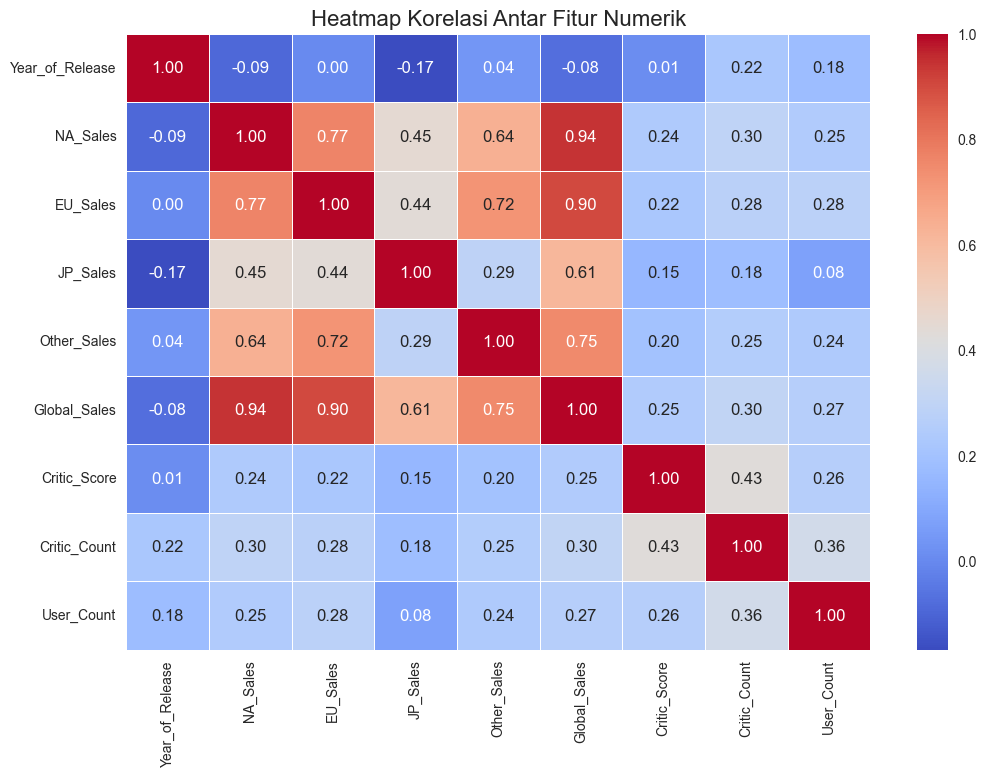

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=16)
plt.show()

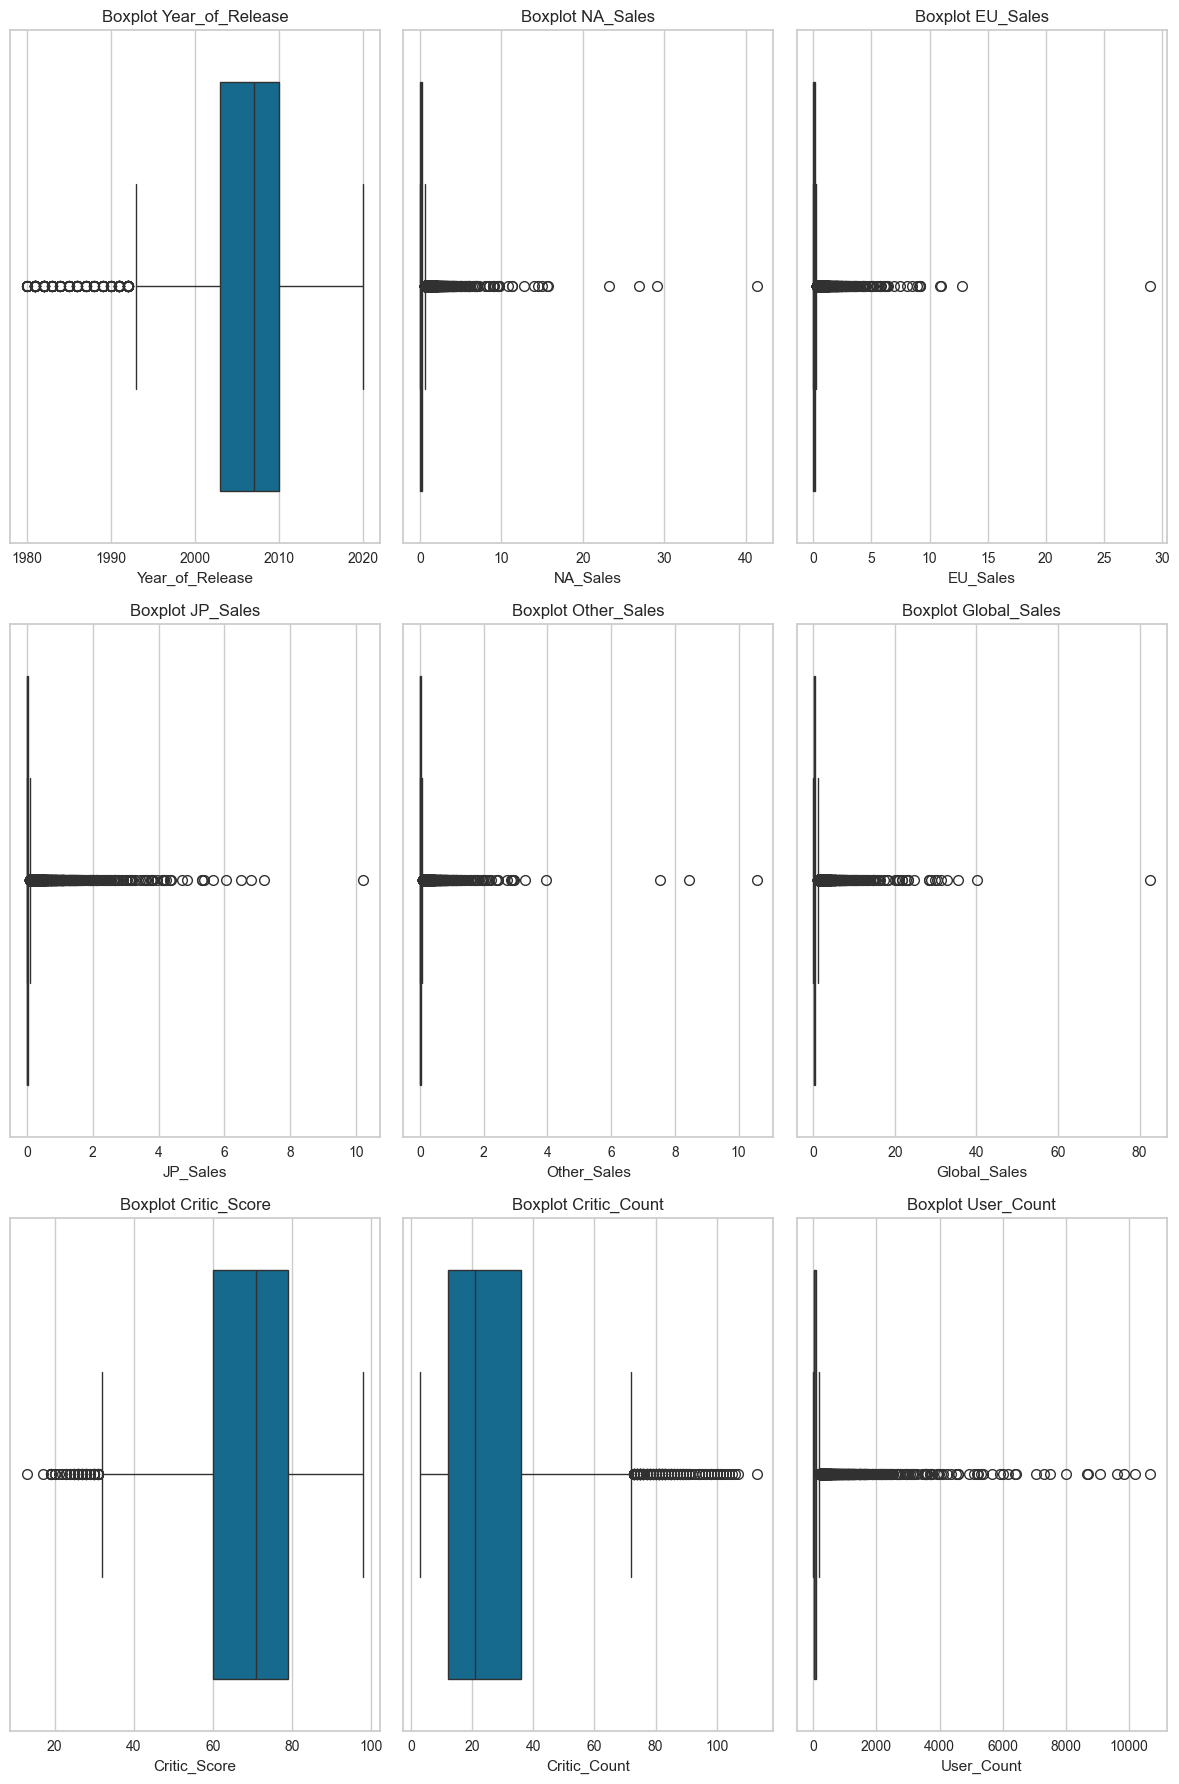

In [11]:
# Hitung jumlah kolom numerik
num_numerical_columns = len(numerical_columns)

# Tentukan jumlah baris dan kolom untuk subplot
ncols = 3  # Jumlah kolom (bisa disesuaikan)
nrows = (num_numerical_columns + ncols - 1) // ncols

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 6 * nrows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [69]:
data_preprocessed = df[numerical_columns].fillna(df[numerical_columns].median())

data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16719 non-null  float64
 1   NA_Sales         16719 non-null  float64
 2   EU_Sales         16719 non-null  float64
 3   JP_Sales         16719 non-null  float64
 4   Other_Sales      16719 non-null  float64
 5   Global_Sales     16719 non-null  float64
 6   Critic_Score     16719 non-null  float64
 7   Critic_Count     16719 non-null  float64
 8   User_Count       16719 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [92]:
# Memisahkan fitur numerik
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 
                      'Other_Sales', 'Global_Sales']

# Standarisasi
scaler_standard = StandardScaler()
data_preprocessed.loc[:, numerical_features] = scaler_standard.fit_transform(data_preprocessed[numerical_features])

# Normalisasi
scaler_minmax = MinMaxScaler()
data_preprocessed.loc[:, numerical_features] = scaler_minmax.fit_transform(data_preprocessed[numerical_features])

# Periksa hasil
print(data_preprocessed[numerical_features].head())

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
4474  0.976190  0.117647       0.0          0.0           1.0
4477  0.571429  0.941176       0.0          0.6           1.0
4479  0.738095  0.705882       0.0          0.2           1.0
4499  0.952381  0.117647       0.0          0.0           1.0
4501  0.738095  0.647059       0.0          0.2           1.0


In [87]:
# # Fungsi untuk mengidentifikasi outlier menggunakan IQR
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Menghapus outlier untuk setiap kolom numerik
# for feature in numerical_features:
#     data_preprocessed = remove_outliers_iqr(data_preprocessed, feature)

# # Periksa hasil setelah penanganan outlier
# plt.figure(figsize=(15, 15))

# # Membuat boxplot untuk setiap fitur numerik
# for i, feature in enumerate(numerical_features):
#     plt.subplot(4, 3, i + 1)  # Mengatur subplot
#     sns.boxplot(x=data_preprocessed[feature])
#     plt.title(f'Boxplot {feature}')

# plt.tight_layout()
# plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [93]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_preprocessed[numerical_features])

In [95]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_preprocessed['Cluster'] = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, data_preprocessed['Cluster'])
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.2f}')

Silhouette Score untuk 4 cluster: 0.41


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

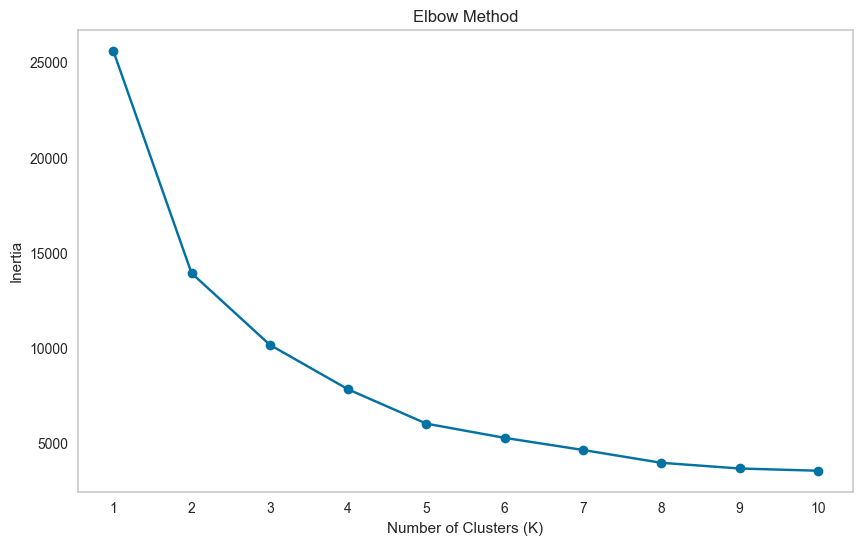

In [96]:
inertia = []
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 3. Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

In [97]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_preprocessed['Cluster'] = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, data_preprocessed['Cluster'])
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.2f}')

Silhouette Score untuk 2 cluster: 0.51


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

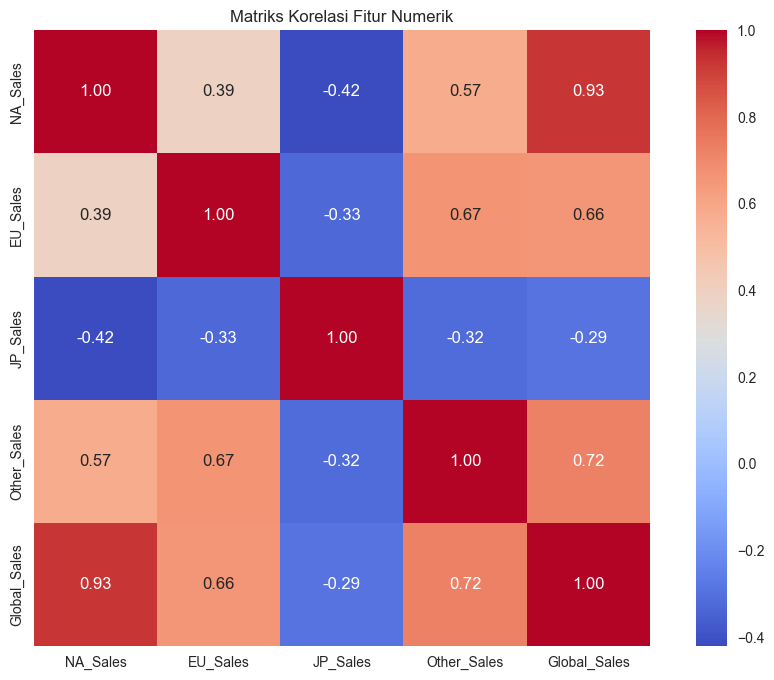

In [98]:
# 1. Menghitung matriks korelasi
correlation_matrix = data_preprocessed[numerical_features].corr()

# 2. Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [99]:
threshold = 0.5  # Ganti dengan threshold yang diinginkan
selected_features = correlation_matrix[abs(correlation_matrix) > threshold].index.tolist()
print("Fitur yang dipilih berdasarkan korelasi:", selected_features)

Fitur yang dipilih berdasarkan korelasi: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [100]:
# 1. Memilih fitur yang telah dipilih
selected_features_df = data_preprocessed[selected_features]

# 2. Normalisasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features_df)

# 3. Melakukan Clustering
optimal_k = 2  # Ganti dengan jumlah cluster yang Anda inginkan
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_preprocessed['Cluster'] = kmeans.fit_predict(scaled_data)

# 4. Menghitung Silhouette Score
silhouette_avg = silhouette_score(scaled_data, data_preprocessed['Cluster'])
print(f'Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.4f}')

Silhouette Score untuk 2 cluster: 0.5052


Silhouette Score untuk 2 cluster: 0.5014
Silhouette Score untuk 3 cluster: 0.3803
Silhouette Score untuk 4 cluster: 0.3837
Silhouette Score untuk 5 cluster: 0.4156
Silhouette Score untuk 6 cluster: 0.4331
Silhouette Score untuk 7 cluster: 0.4252
Silhouette Score untuk 8 cluster: 0.4154
Silhouette Score untuk 9 cluster: 0.4321
Silhouette Score untuk 10 cluster: 0.4401


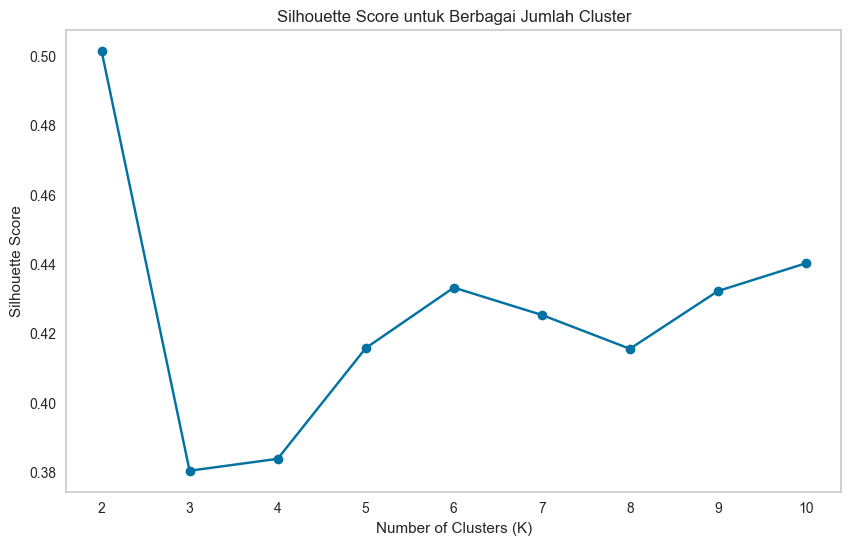

In [81]:
silhouette_scores = []
K_range = range(2, 11)  # Uji dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score untuk {k} cluster: {silhouette_avg:.4f}')

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [34]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.